# House Price prediction

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import pickle

### Dataset Description

This data gives different sales prices with respect to type of houses in USA.

This data frame contains the following columns:

Input variables

1 -Avg. Area Income	

2 - Avg. Area House Age

3 -Avg. Area Number of Rooms	

4 - Avg. Area Number of Bedrooms

5 - Address 

Output variable :

6 - Area Population

In [2]:
#Load the dataset
df=pd.read_csv("USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


# Exploratory Data Analysis

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
#Random 25 samples
df.sample(25)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
2066,79057.798917,7.634776,10.219902,3.43,27142.028199,2.050594e+06,"34645 Brandy Station\nSalinasport, MO 74104"
3572,80694.128150,6.569158,6.455327,2.15,46249.625657,1.770372e+06,"24903 Anthony Drives\nLake Suzanneborough, AL ..."
504,70102.726345,6.646560,7.110696,3.21,28280.999196,1.379386e+06,"36939 Christopher Common Apt. 022\nRuizburgh, ..."
2915,40581.778087,4.169820,7.415416,5.44,48820.230256,5.094996e+05,"834 Thompson Shoals Apt. 599\nEast Taylor, OK ..."
1041,74275.504055,6.001426,8.494697,6.32,38535.726432,1.610217e+06,"7587 Mcdonald Common Apt. 738\nElliottshire, D..."
726,61776.615663,6.834479,8.285496,3.05,27970.521731,1.325820e+06,"999 Lewis Fork\nSouth Stephanie, WV 50293-8967"
324,76907.238161,5.205508,6.462700,4.21,21658.409323,6.792290e+05,"433 Patterson Parkways\nEast Ryan, RI 32244-3823"
1878,73801.021759,6.495309,7.212254,4.49,30504.814913,1.455107e+06,"8473 Blackwell Spring Apt. 102\nAprilfort, MN ..."
2799,50665.988732,7.385098,7.067905,5.19,29726.014599,1.154883e+06,"03710 Solis Dam\nHoldenton, MO 26586-8244"
72,57279.063576,5.118109,6.561520,3.17,44023.790685,8.520995e+05,"024 William Course\nEast Charlotteview, DE 690..."


In [5]:
#Dimension of the dataframe
df.shape

(5000, 7)

In [6]:
# All the columns
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
#description of  statistics
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
#summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
#Datatypes of each column
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [10]:
#unique values present in target column
df["Price"].unique()

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

These are the prices of houses

### Check for missing values

In [11]:
df.isnull()
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

No missing value

### Check Duplicate values

In [12]:
duplicate = df.duplicated()
duplicate.sum()

0

No duplicates

### Data cleaning

In [13]:
# Drop the id column
column_to_drop = 'Address'
df1 = df.drop(columns=[column_to_drop])
df1.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [14]:
df1.groupby('Price').mean()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
Price,,,,,
1.593866e+04,47320.657205,3.558054,7.006987,3.16,15776.618595
3.114052e+04,37971.207566,4.291224,5.807510,3.24,33267.767728
8.859177e+04,60167.672607,4.590613,3.950973,4.06,16811.303292
1.430274e+05,35963.330809,3.438547,8.264122,3.28,24435.777302
1.515271e+05,48735.924512,5.543730,6.091906,2.43,19682.347295
...,...,...,...,...,...
2.318286e+06,94733.971275,7.885829,7.162373,5.41,46314.690046
2.330290e+06,83814.101156,8.571797,7.392164,3.39,51538.056796
2.332111e+06,107701.748378,7.143522,8.518608,3.29,37619.439929


## Data Visualisation

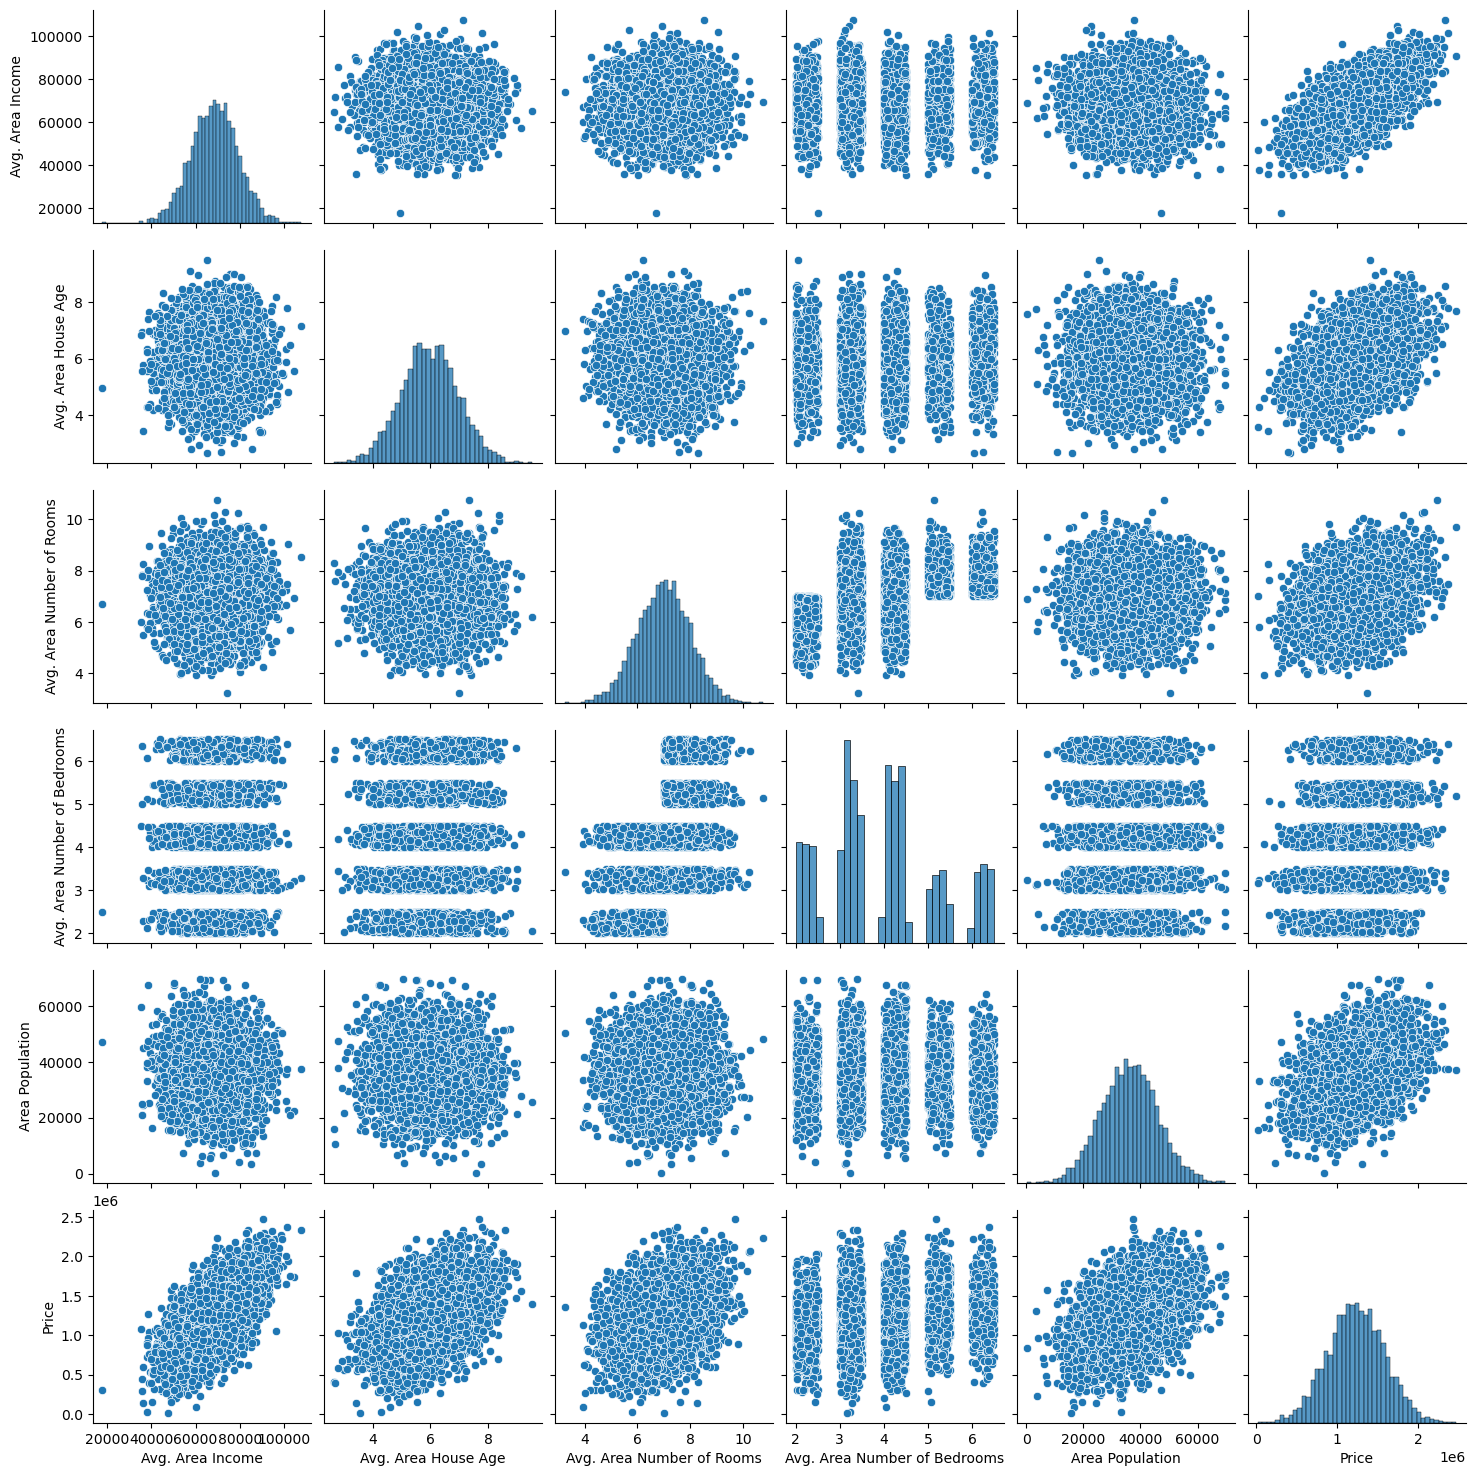

In [15]:
# Visualise the dataset
sns.pairplot(df1)

Text(0.5, 0.98, 'House price prediction Univariate plot')

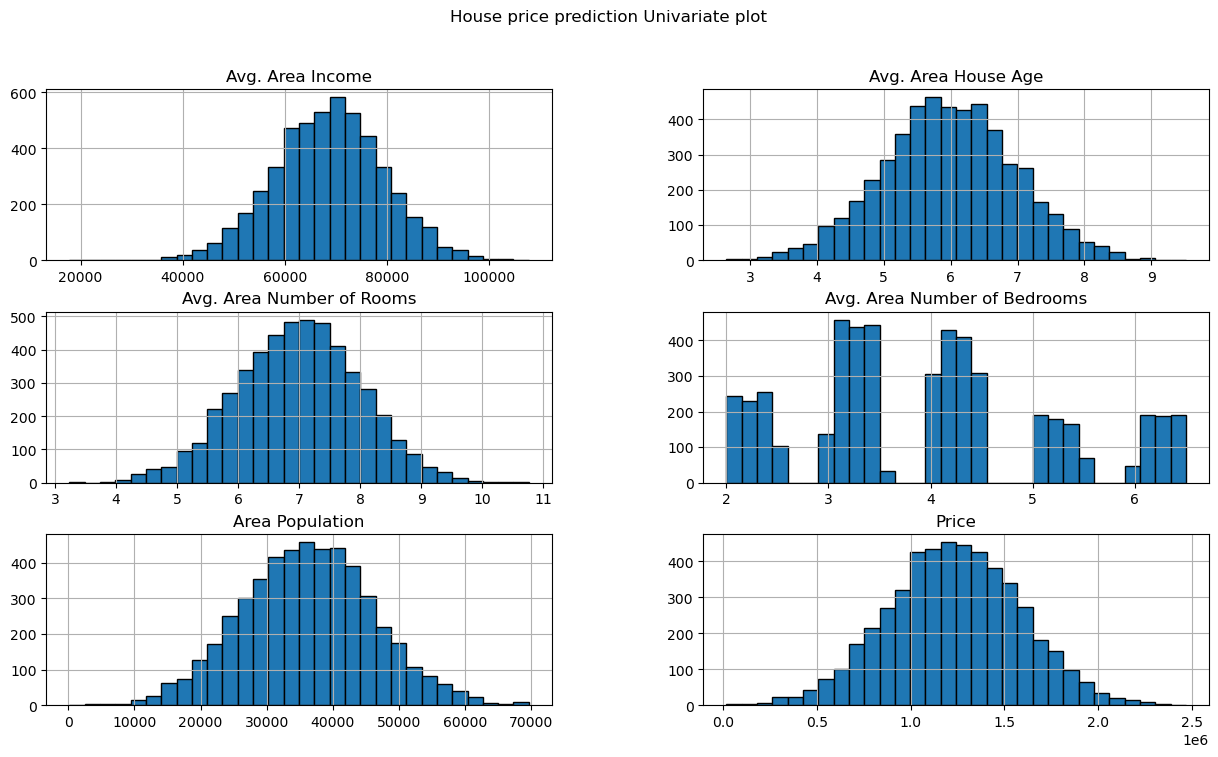

In [16]:
df1.hist(figsize=(15,8),bins=30,edgecolor="black")
plt.suptitle("House price prediction Univariate plot")

C:\Users\shromana\AppData\Local\Temp\ipykernel_7676\3858808144.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.Price)


<Axes: xlabel='Price', ylabel='Density'>

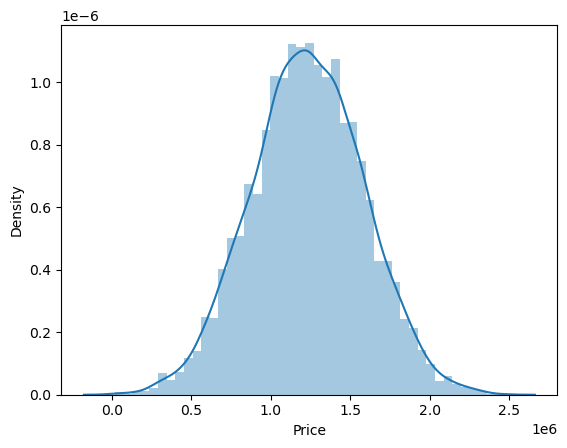

In [42]:
# Normality assumption - Checks
sns.distplot(df1.Price)

Follows Normal Distribution

## Correlation metrics

In [17]:
correlaion = df1.corr()

Text(0.5, 1.0, 'House Price prediction Multivariate Plot')

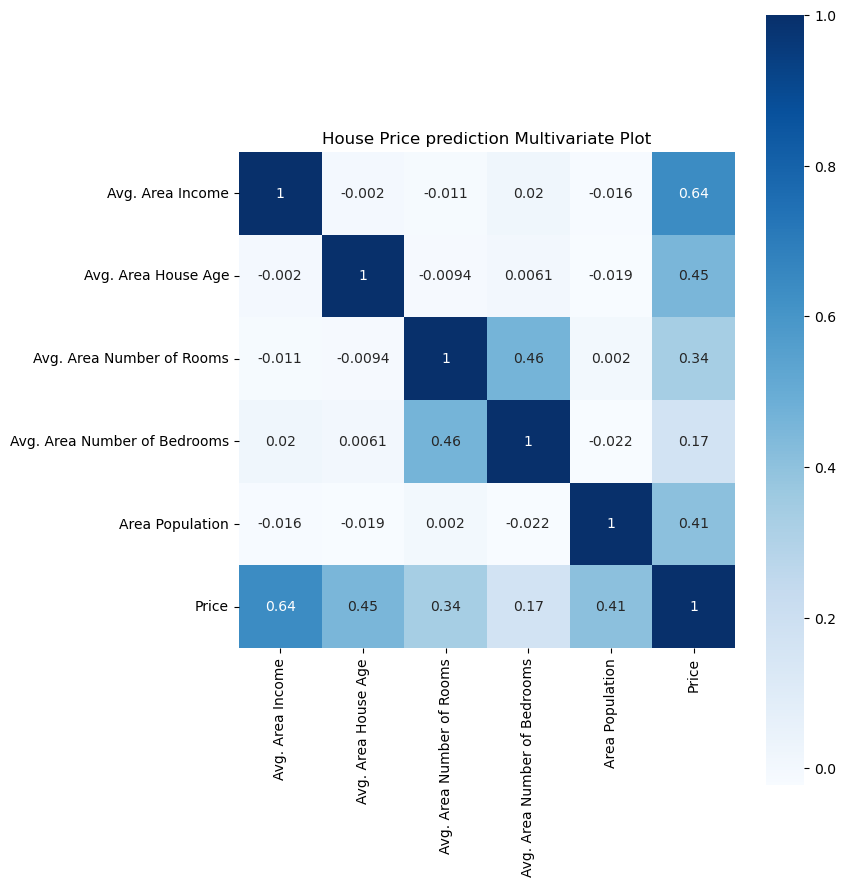

In [18]:
fig = plt.subplots(figsize = (8,10))
sns.heatmap(correlaion, vmax=1, square=True, annot=True, cmap ='Blues')
plt.title("House Price prediction Multivariate Plot")

In [19]:
df1.corr()['Price'].sort_values()

Avg. Area Number of Bedrooms    0.171071
Avg. Area Number of Rooms       0.335664
Area Population                 0.408556
Avg. Area House Age             0.452543
Avg. Area Income                0.639734
Price                           1.000000
Name: Price, dtype: float64

High correlation between Price and income.

## Relationship of features with each other

In [20]:
features = ['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']

In [21]:
X = df1[features]
y = df1['Price']


Features and target are separated

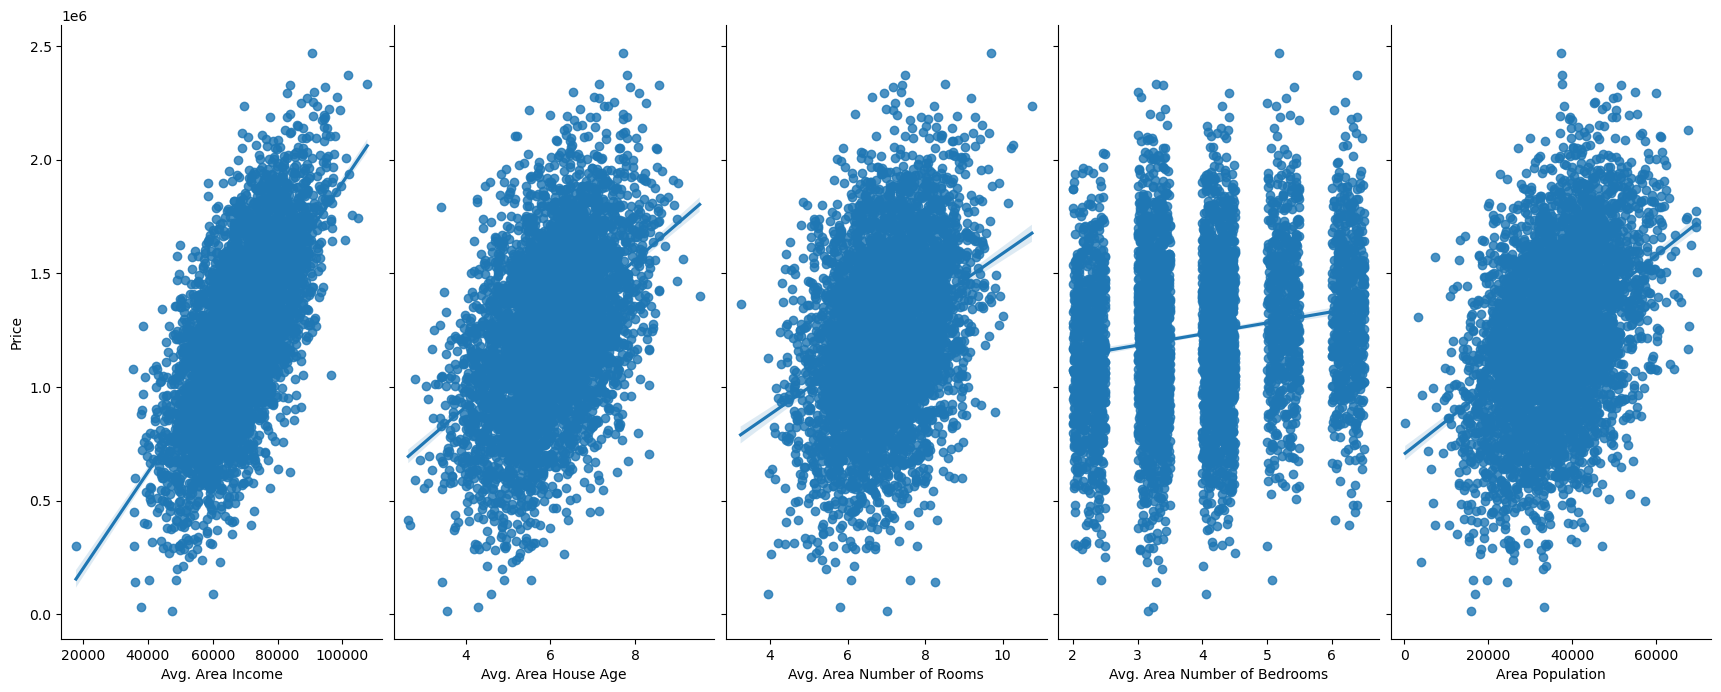

In [22]:
sns.pairplot(df1, x_vars=features, y_vars='Price', kind = 'reg', height=7, aspect = 0.5)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 ,random_state = 3)

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4000, 5)
(4000,)
(1000, 5)
(1000,)


80 percent for training, 20 percent for testing

## Normalize the numerical variables

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model

In [26]:
regressor = LinearRegression()

In [27]:
regressor.fit(X_train,y_train)

LinearRegression()

In [28]:
#Coefficient
regressor.coef_

array([229040.1909581 , 163315.95780311, 122461.70053242,   1670.71700118,
       150605.35774739])

In [29]:
#Intercept
regressor.intercept_

1234585.0191647685

In [30]:
### Training Score
train_score = round(regressor.score(X_train, y_train)*100,2)
train_score

91.87

Training score is 91.87%

In [31]:
pred = regressor.predict(X_test)

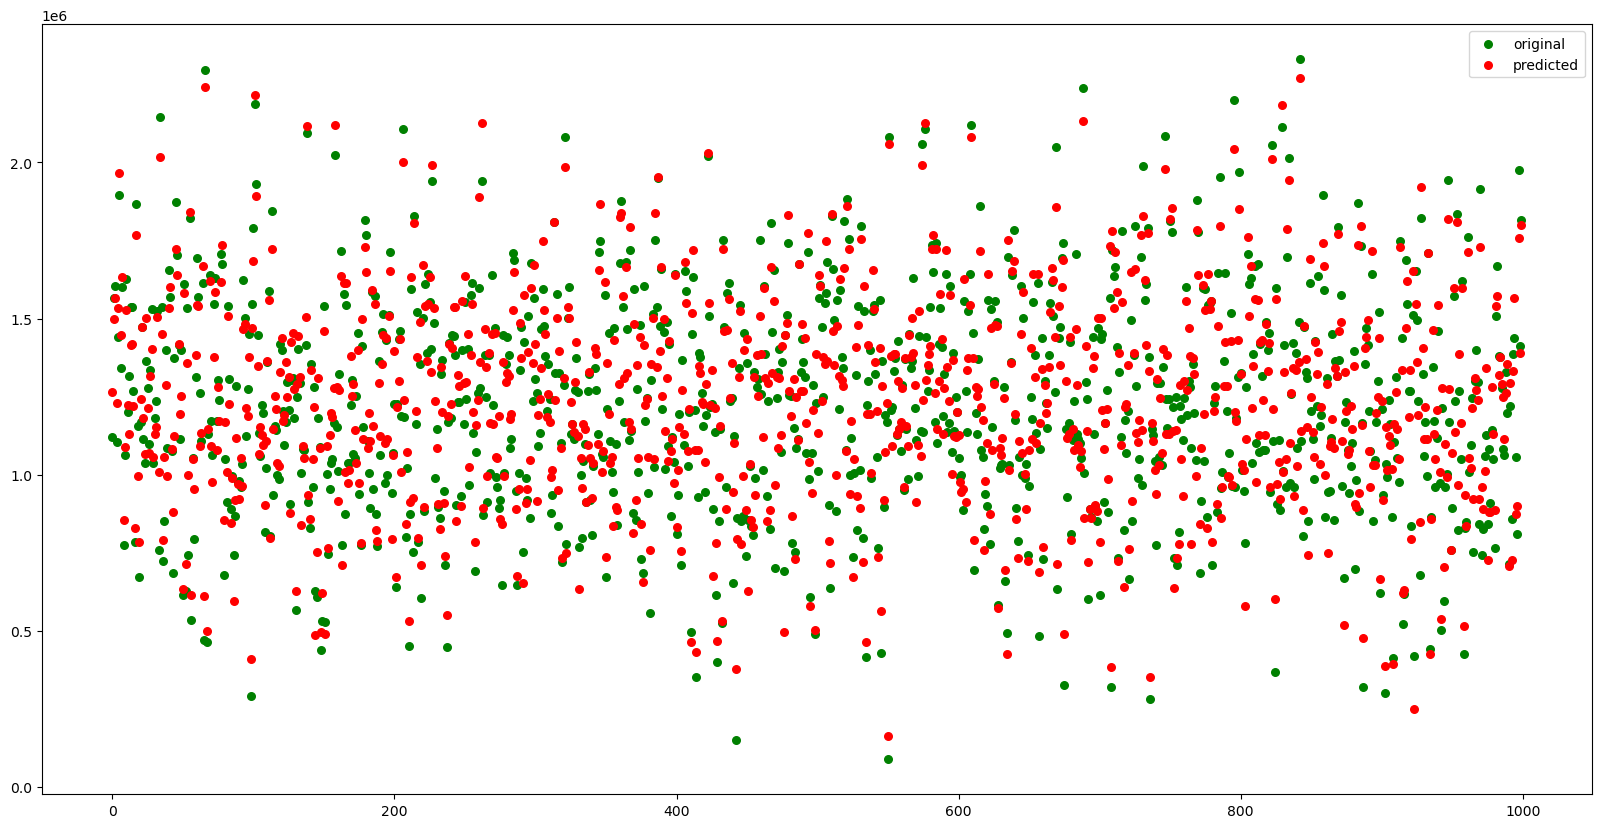

In [32]:
fig,ax = plt.subplots(figsize =(20,10))
x_ax = range(len(X_test))
plt.scatter(x_ax,y_test,s=30,color="green",label="original")
plt.scatter(x_ax,pred,s=30,color="red",label="predicted")
plt.legend()
plt.show()

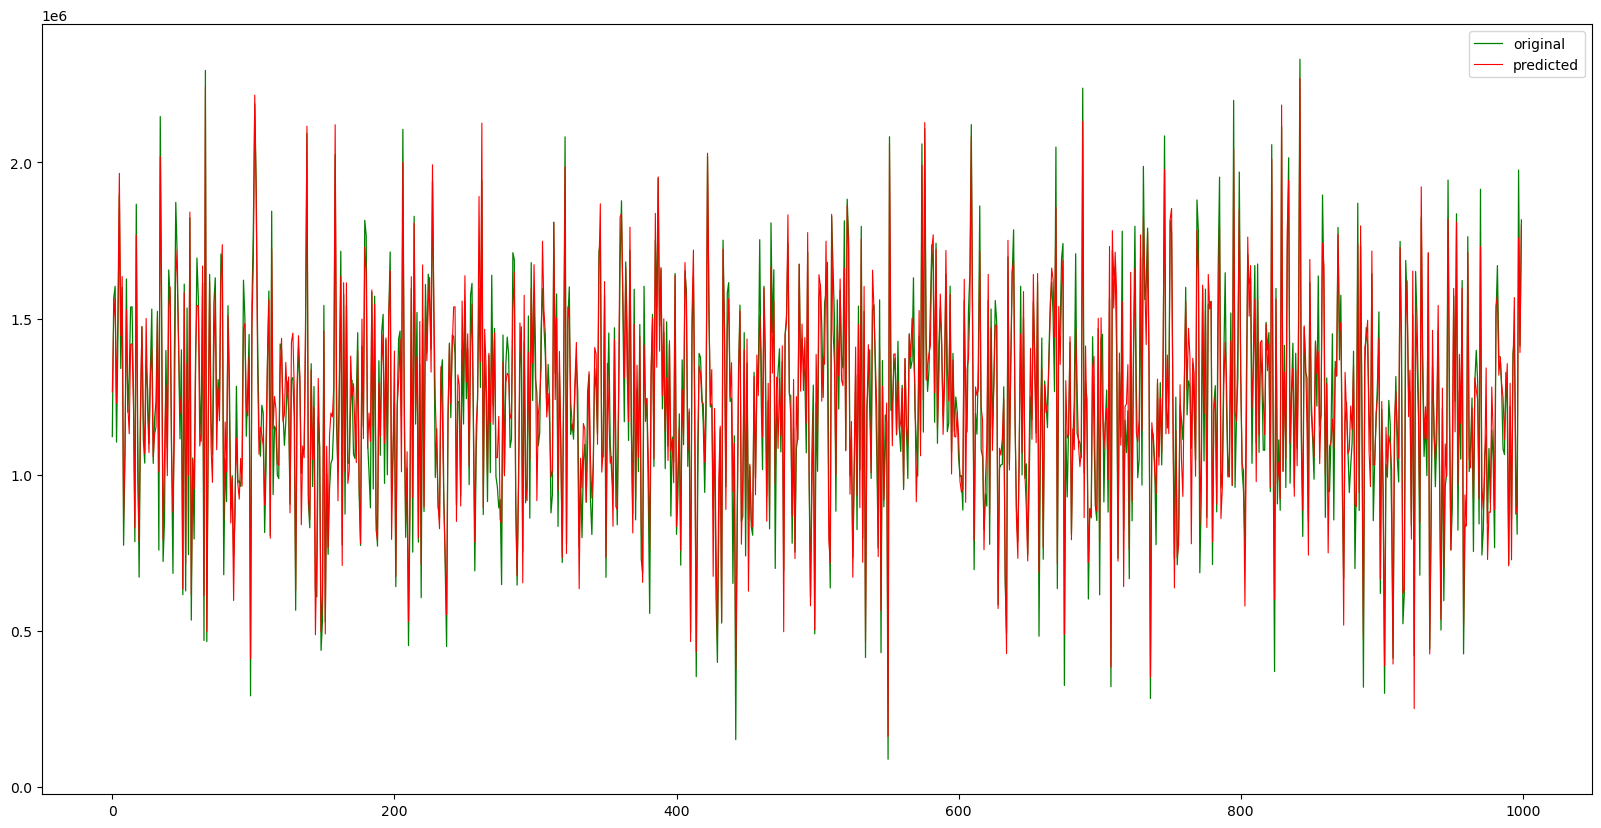

In [33]:
fig,ax = plt.subplots(figsize =(20,10))
x_ax = range(len(X_test))
plt.plot(x_ax,y_test,lw=0.9,color="green",label="original")
plt.plot(x_ax,pred,lw=0.8,color="red",label="predicted")
plt.legend()
plt.show()

Model has predicted well.

### Accuracy of the model

In [34]:
test_score = round(regressor.score(X_test, y_test)*100,2)
test_score


91.51

It has 91.51% accuracy.

### Prediction

In [35]:
prediction1=pd.DataFrame(pred)
prediction1.head()

,0
0,1.264915e+06
1,1.498146e+06
2,1.565427e+06
3,1.229484e+06
4,1.533145e+06


## Root mean Squared Error

In [36]:
test_rmse = metrics.mean_squared_error(pred,y_test)**0.5
test_rmse

103810.23007042063

In [37]:
r2_score(y_test,pred)

0.9151210344418178

In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:',rmse)

Mean Absolute Error: 83683.90119558288
Mean Squared Error: 10776563867.273664
Root Mean Squared Error: 103810.23007042063


In [39]:
df2 =pd.DataFrame({'Actual':y_test,'Predicted':pred,'Variance':y_test-pred})
df2.head()

,Actual,Predicted,Variance
2584,1.122083e+06,1.264915e+06,-142832.105552
4338,1.565152e+06,1.498146e+06,67005.202833
4556,1.603075e+06,1.565427e+06,37648.572202
3438,1.104116e+06,1.229484e+06,-125368.732487
737,1.442129e+06,1.533145e+06,-91016.272691


# Predictions on new data

In [40]:
# Lastly, let's use the trained model to make predictions on new data
new_data = np.array([[79248.642455,6.002900,6.730821,3.09,40173.072174]])
# Create a new instance of StandardScaler for the new data
sc = StandardScaler()
new_data_scaled = sc.fit_transform(new_data)

# Make predictions
predicted_quality = regressor.predict(new_data_scaled)

print("Predicted House Price:", predicted_quality[0])

Predicted House Price: 1234585.0191647685


## Saving the model

In [41]:
filename = 'priceprediction_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))